In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from collections import defaultdict
import gspread 
from oauth2client.service_account import ServiceAccountCredentials
import statistics
import scipy
import itertools
import datetime

In [2]:
scope = ['https://spreadsheets.google.com/feeds',
         'https://www.googleapis.com/auth/drive'] 
creds = ServiceAccountCredentials.from_json_keyfile_name('C:\\Users\\pepea\\Downloads\\Wordle\\client_secret.json', scope) 
client = gspread.authorize(creds)

In [3]:
data = pd.read_csv('22471_unreconciled.csv')

In [4]:
tegula_x1 = data['T2_1 Tegula length: x1']
tegula_x1 = np.array(tegula_x1)
tegula_x2 = data['T2_1 Tegula length: x2']
tegula_x2 = np.array(tegula_x2)
tegula_y1 = data['T2_1 Tegula length: y1']
tegula_y1 = np.array(tegula_y1)
tegula_y2 = data['T2_1 Tegula length: y2']
tegula_y2 = np.array(tegula_y2)

scale_x1 = data['T2_1 Set scale (0.5 cm): x1']
scale_x1 = np.array(scale_x1)
scale_x2 = data['T2_1 Set scale (0.5 cm): x2']
scale_x2 = np.array(scale_x2)
scale_y1 = data['T2_1 Set scale (0.5 cm): y1']
scale_y1 = np.array(scale_y1)
scale_y2 = data['T2_1 Set scale (0.5 cm): y2']
scale_y2 = np.array(scale_y2)

In [5]:
alec_data = client.open("imageJ-21776").get_worksheet(3)
alec_tms = alec_data.col_values(3)[1:]
alec_tms = [float(v) for v in alec_tms]
alec_tms = np.array(alec_tms)
alec_mt = alec_data.col_values(2)[1:]
alec_mt = [float(v) for v in alec_mt]
alec_mt = np.array(alec_mt)
alec_corrected = ( alec_mt / alec_tms ) * 0.5

emma_data = client.open("imageJ-21776").get_worksheet(4)
emma_tms = emma_data.col_values(3)[1:]
emma_tms = [float(v) for v in emma_tms]
emma_tms = np.array(emma_tms)
emma_mt = emma_data.col_values(2)[1:]
emma_mt = [float(v) for v in emma_mt]
emma_mt = np.array(emma_mt)
emma_corrected = ( emma_mt / emma_tms ) * 0.5

kaytlin_data = client.open("imageJ-21776").get_worksheet(5)
kaytlin_tms = kaytlin_data.col_values(3)[1:]
kaytlin_tms = [float(v[:-3]) for v in kaytlin_tms]
kaytlin_tms = np.array(kaytlin_tms)
kaytlin_mt = kaytlin_data.col_values(2)[1:]
kaytlin_mt = [float(v[:-3]) for v in kaytlin_mt]
kaytlin_mt = np.array(kaytlin_mt)
kaytlin_corrected = ( kaytlin_mt / kaytlin_tms ) * 0.5

luz_data = client.open("imageJ-21776").get_worksheet(6)
luz_tms = luz_data.col_values(3)[1:]
luz_tms = [float(v) for v in luz_tms]
luz_tms = np.array(luz_tms)
luz_mt = luz_data.col_values(2)[1:]
luz_mt = [float(v) for v in luz_mt]
luz_mt = np.array(luz_mt)
luz_corrected = ( luz_mt / luz_tms ) * 0.5

rosie_data = client.open("imageJ-21776").get_worksheet(7)
rosie_tms = rosie_data.col_values(3)[1:]
rosie_tms = [float(v) for v in rosie_tms]
rosie_tms = np.array(rosie_tms)
rosie_mt = rosie_data.col_values(2)[1:]
rosie_mt = [float(v) for v in rosie_mt]
rosie_mt = np.array(rosie_mt)
rosie_corrected = ( rosie_mt / rosie_tms ) * 0.5

filenames = client.open("imageJ-21776").get_worksheet(3).col_values(1)[1:]

In [6]:
tegula_pixel_distance = ( (tegula_x2 - tegula_x1)**2 + (tegula_y2 - tegula_y1)**2 )**0.5 #distance formula

scale_pixel_distance = ( (scale_x2 - scale_x1)**2 + (scale_y2 - scale_y1)**2 )**0.5

pixel_to_cm_conversion = 0.5 / scale_pixel_distance

tegula_distance_cm_array = tegula_pixel_distance * pixel_to_cm_conversion

In [7]:
subject_id_list = data['Filename']
confidence_list = data['T3_1 Were you able to measure the bee?'] #whether or not they were able to measure the bee
user_list = data['user_name']

distance_grouped_by_id_yes_and_no = defaultdict(list) #group by ID, includes confidence yes and no
distance_grouped_by_id_yes = defaultdict(list) #group by ID, includes only confidence yes

for subject_id, tegula_distance_cm, answer, user in zip(subject_id_list, tegula_distance_cm_array, confidence_list, user_list):
    if user != 'VeronicaGutierrez':
        distance_grouped_by_id_yes_and_no[ subject_id ].append(tegula_distance_cm)
        if answer == 'Yes':
            distance_grouped_by_id_yes[ subject_id ].append(tegula_distance_cm)

In [8]:
distance_grouped_by_id_find_yes = defaultdict(list)

for subject_id, tegula_distance_cm, answer, user in zip(subject_id_list, tegula_distance_cm_array, confidence_list, user_list):
    distance_grouped_by_id_find_yes[ subject_id ].append(tegula_distance_cm)
    distance_grouped_by_id_find_yes[ subject_id ].append(answer)


distance_grouped_by_id_exclude_all_yes = defaultdict(list)

for key, value in distance_grouped_by_id_find_yes.items():
    if 'No' in value:
        distance_grouped_by_id_exclude_all_yes[key] = value


distance_grouped_by_id_exclude_all_yes_reformat_yes_and_no = defaultdict(list)

for key, value in distance_grouped_by_id_exclude_all_yes.items():
    new_value = []
    for item in value:
        if type(item) == np.float64:
            new_value.append(item)
    distance_grouped_by_id_exclude_all_yes_reformat_yes_and_no[key] = new_value

In [9]:
distance_grouped_by_id_exclude_all_yes_reformat_yes = defaultdict(list)

for key,value in distance_grouped_by_id_exclude_all_yes_reformat_yes_and_no.items(): #67 keys with no, remove data specific to No
    for item in value:
        for subject_id, tegula_distance, answer in zip(subject_id_list, tegula_distance_cm_array, confidence_list):
            if subject_id == key and tegula_distance == item and answer == 'Yes':
                distance_grouped_by_id_exclude_all_yes_reformat_yes[key].append(tegula_distance)

In [10]:
tegula_distance_comparison = defaultdict(list)

for subject_id, tegula_distance_cm, user in zip(subject_id_list, tegula_distance_cm_array, user_list):
    tegula_distance_comparison[ subject_id ].append(tegula_distance_cm)

In [11]:
tegula_distance_comparison_researchers = defaultdict(list)

for filename, a,k,l,r in zip(filenames, alec_corrected, kaytlin_corrected, luz_corrected, rosie_corrected):
    distance_list = [a,k,l,r]
    tegula_distance_comparison_researchers[ filename ] += distance_list

In [12]:
tegula_distance_comparison_side_by_side = defaultdict(list)

for key in tegula_distance_comparison_researchers:
    if key in tegula_distance_comparison:
        pos1 = tegula_distance_comparison[key]
        pos2 = tegula_distance_comparison_researchers[key]
        
        tegula_distance_comparison_side_by_side[key].append(pos1)
        tegula_distance_comparison_side_by_side[key].append(pos2)

In [9]:
tegula_list = [0.15,0.17,0.2,0.22,0.24]
print( statistics.mean(tegula_list))
print('')

for index,item in enumerate(tegula_list):
    try:
        x = item
        y = tegula_list[index+1]
        percent_difference_pos = 100 * abs( x - y) / ( (x + y) / 2 )
        print(round(percent_difference_pos,2))
    except:
        pass

0.196

12.5
16.22
9.52
8.7


In [13]:
percent_difference_pos_list = []
pos1_mean_list = []
pos2_mean_list = []
key_list = []

for key, value in tegula_distance_comparison_side_by_side.items():
    pos1_mean = statistics.mean(value[0])
    pos2_mean = statistics.mean(value[1])

    key_list.append(key)
    pos1_mean_list.append(pos1_mean)
    pos2_mean_list.append(pos2_mean)

    percent_difference_pos = 100 * abs( pos1_mean - pos2_mean) / ( (pos1_mean + pos2_mean) / 2 )
    
    percent_difference_pos_list.append(percent_difference_pos)

Text(0, 0.5, '         Average Tegula Measurement for a Given Subject')

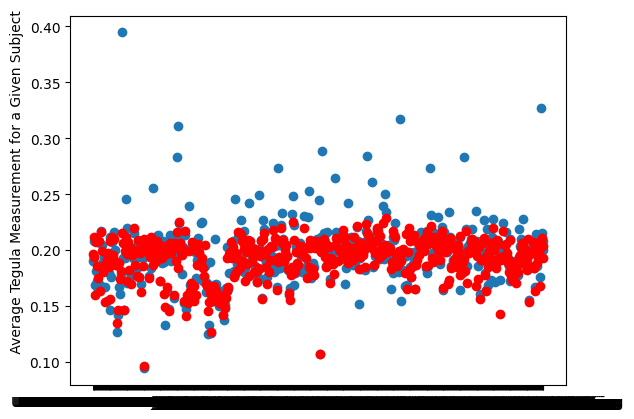

In [14]:
plt.scatter(key_list, pos1_mean_list)
plt.scatter(key_list, pos2_mean_list, color = 'r')
plt.ylabel('         Average Tegula Measurement for a Given Subject')

In [15]:
percent_diff_research_vs_cs2 = []
for r,cs in zip(pos1_mean_list, pos2_mean_list):
    percent_diff = 100 * abs(r - cs) / ( (r+cs)/2 )
    percent_diff_research_vs_cs2.append(percent_diff)
statistics.mean(percent_diff_research_vs_cs2)

5.272772893416205

In [16]:
scipy.stats.ttest_ind(pos1_mean_list, pos2_mean_list)

Ttest_indResult(statistic=2.889812230261959, pvalue=0.003941856321002669)

In [17]:
confidence_by_subject_id = defaultdict(float)
confidence_by_subject_id2 = defaultdict(float)
confidence_by_subject_id3 = defaultdict(float)

for s,c in zip(subject_id_list, confidence_list):
    if c == 'No':
        confidence_by_subject_id[s] += 1
    elif c == 'Yes':
        confidence_by_subject_id2[s] += 1
    confidence_by_subject_id3[s] +=1

confidence_by_subject_id_list = [v for k,v in confidence_by_subject_id.items()]

(array([  0., 465.,   3.,   0.,   0.,   0.,  11.]),
 array([ 3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 <BarContainer object of 7 artists>)

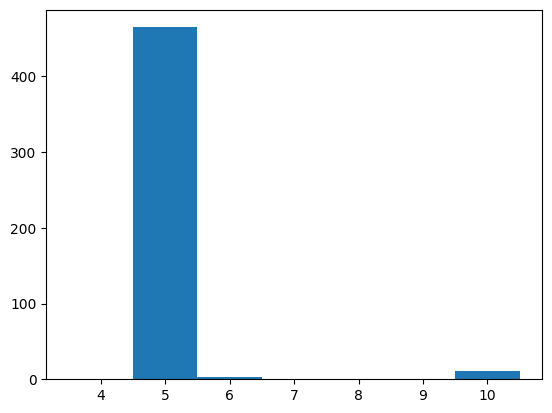

In [49]:
plt.hist(confidence_by_subject_id3.values(), bins = 7, range = (3.5,10.5))

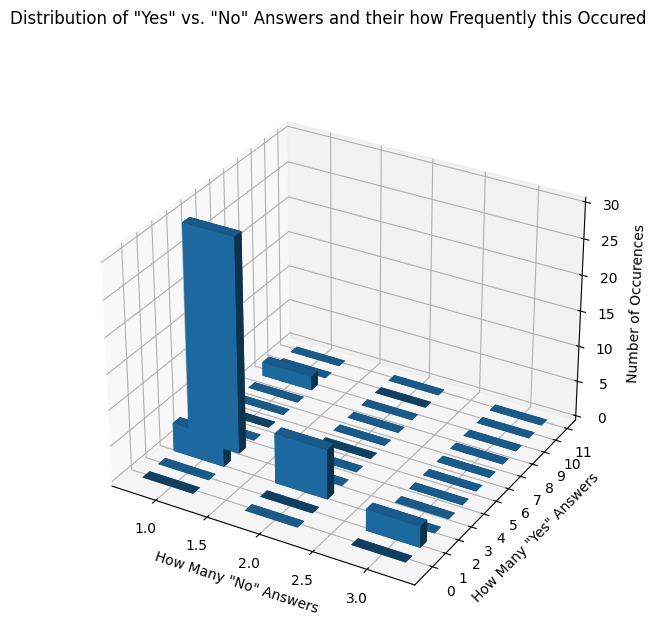

In [19]:
x = []
y = []

for k,v in confidence_by_subject_id.items():
    x.append(v)
    y.append(confidence_by_subject_id2[k])

fig13 = plt.figure(figsize = (10,7))
ax13 = fig13.add_subplot(projection='3d')
hist, xedges, yedges = np.histogram2d(x, y, bins=[3,11], range=[[1, 4], [0, 12]])

# Construct arrays for the anchor positions of the 16 bars.
xpos, ypos = np.meshgrid(xedges[:-1] - 0.25, yedges[:-1] - 0.5, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 16 bars.
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

fig13.suptitle('Distribution of "Yes" vs. "No" Answers and their how Frequently this Occured')

ax13.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')
ax13.set_yticks(range(12))
ax13.set_xlabel('How Many "No" Answers')
ax13.set_ylabel('How Many "Yes" Answers')
ax13.set_zlabel('Number of Occurences')

plt.show()

In [20]:
half_clean_data_by_subject_id = defaultdict(list)
mismeasure_count = 0

for subject_id,user,tegula_distance,scale_distance in zip(subject_id_list,user_list,tegula_distance_cm_array,scale_pixel_distance):
    if tegula_distance < 0.4:
        half_clean_data_by_subject_id[subject_id].append(tegula_distance)
    else:
        mismeasure_count += 1

In [47]:
percent_difference_var = 10


best_measurement_index_dict = defaultdict(list)

for k,value in half_clean_data_by_subject_id.items():
    v = [i for i in value]
    if len(v) > 1:
        v.sort()
    for index,measurement in enumerate(v):
        index_counter = 2
        
        indicator = 1
        while indicator == 1:
            if index + index_counter < len(v):
                cropped_v = v[index:index + index_counter]

                x = v[0]
                y = v[-1]

                percent_difference = 100 * abs(x - y) / ( (x + y) / 2 )
                if percent_difference > percent_difference_var:
                    indicator = 0
                    break
            
                if indicator == 1:
                    best_measurement_index_dict[k].append( (index,index + index_counter) )

                index_counter += 1

            else:
                break


for k,v in best_measurement_index_dict.items():
    tuple_var_difference_list = []
    for tuple_var in v:
        tuple_var_difference = tuple_var[1] - tuple_var[0]
        tuple_var_difference_list.append(tuple_var_difference)

    longest_list = max(tuple_var_difference_list)
    longest_list_index = tuple_var_difference_list.index(longest_list)
    new_v = v[longest_list_index]

    best_measurement_index_dict[k] = new_v

    
best_measurement_dict = {}
best_measurement_list = []

for k,v in best_measurement_index_dict.items():
    index1 = v[0]
    index2 = v[1]
    
    v = half_clean_data_by_subject_id[k]
    v.sort()

    best_measurement_dict[k] = v[index1:index2]


community_scientist_comparison_list, researcher_comparison_list, key_list_comparison = [], [], []

for k,v in best_measurement_dict.items():
    community_scientist_val = statistics.mean(v)
    researcher_val = statistics.mean(tegula_distance_comparison_researchers[k])

    community_scientist_comparison_list.append(community_scientist_val)
    researcher_comparison_list.append(researcher_val)

    key_list_comparison.append(k)

Text(0, 0.5, '         Average Tegula Measurement for a Given Subject')

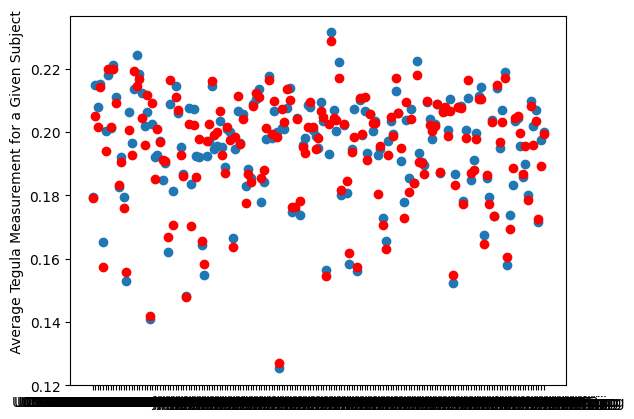

In [48]:
plt.scatter(key_list_comparison, community_scientist_comparison_list)
plt.scatter(key_list_comparison, researcher_comparison_list, color = 'r')
plt.ylabel('         Average Tegula Measurement for a Given Subject')

In [46]:
print(scipy.stats.ttest_ind(community_scientist_comparison_list, researcher_comparison_list))
print(len(best_measurement_index_dict))

Ttest_indResult(statistic=-1.1227681281665043, pvalue=0.261858324325737)
419


In [24]:
p_value_list = []
number_of_viable_images_list = []

for percent_difference_var in range(0,1000):
    percent_difference_var = percent_difference_var / 10
    if percent_difference_var%10 == 0:
        print(percent_difference_var)

    best_measurement_index_dict = defaultdict(list)

    for k,value in half_clean_data_by_subject_id.items():
        v = [i for i in value]
        if len(v) > 1:
            v.sort()
        for index,measurement in enumerate(v):
            index_counter = 2
            
            indicator = 1
            while indicator == 1:
                if index + index_counter < len(v):
                    cropped_v = v[index:index + index_counter]

                    x = v[0]
                    y = v[-1]

                    percent_difference = 100 * abs( x - y) / ( (x + y) / 2 )
                    if percent_difference > percent_difference_var:
                        indicator = 0
                        break
                
                    if indicator == 1:
                        best_measurement_index_dict[k].append( (index,index + index_counter) )

                    index_counter += 1

                else:
                    break


    for k,v in best_measurement_index_dict.items():
        tuple_var_difference_list = []
        for tuple_var in v:
            tuple_var_difference = tuple_var[1] - tuple_var[0]
            tuple_var_difference_list.append(tuple_var_difference)

        longest_list = max(tuple_var_difference_list)
        longest_list_index = tuple_var_difference_list.index(longest_list)
        new_v = v[longest_list_index]

        best_measurement_index_dict[k] = new_v

        
    best_measurement_dict = {}
    best_measurement_list = []

    for k,v in best_measurement_index_dict.items():
        index1 = v[0]
        index2 = v[1]
        
        v = half_clean_data_by_subject_id[k]
        v.sort()

        best_measurement_dict[k] = v[index1:index2]


    community_scientist_comparison_list, researcher_comparison_list, key_list_comparison = [], [], []

    for k,v in best_measurement_dict.items():
        community_scientist_val = statistics.mean(v)
        researcher_val = statistics.mean(tegula_distance_comparison_researchers[k])

        community_scientist_comparison_list.append(community_scientist_val)
        researcher_comparison_list.append(researcher_val)

        key_list_comparison.append(k)

    p_value = scipy.stats.ttest_ind(community_scientist_comparison_list, researcher_comparison_list)[1]
    number_of_viable_images = len(community_scientist_comparison_list)
    p_value_list.append(p_value)
    number_of_viable_images_list.append(number_of_viable_images)

0.0


C:\Users\pepea\AppData\Local\Temp\ipykernel_4620\2596487903.py:77: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  p_value = scipy.stats.ttest_ind(community_scientist_comparison_list, researcher_comparison_list)[1]
c:\Users\pepea\Downloads\Wordle\venv\lib\site-packages\scipy\stats\_stats_py.py:1250: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
c:\Users\pepea\Downloads\Wordle\venv\lib\site-packages\scipy\stats\_stats_py.py:1250: RuntimeWarning: invalid value encountered in double_scalars
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


10.0
20.0
30.0
40.0
50.0
60.0
70.0
80.0
90.0


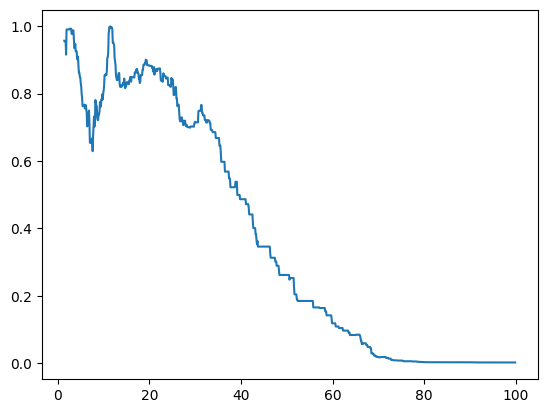

In [25]:
plt.plot(np.array(range(0,1000))/10,p_value_list)

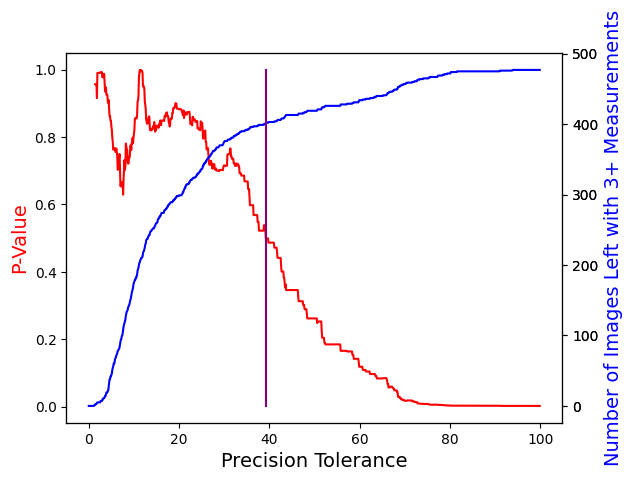

In [50]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(np.array(range(0,1000))/10,
        p_value_list,
        color="red")
# set x-axis label
ax.set_xlabel("Precision Tolerance", fontsize = 14)
# set y-axis label
ax.set_ylabel("P-Value",
                color="red",
              fontsize=14)


# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(np.array(range(0,1000))/10,
        number_of_viable_images_list,
        color="blue")
ax2.set_ylabel("Number of Images Left with 3+ Measurements",color="blue",fontsize=14)

ax3=ax.twinx()
ax3.plot(np.ones(2)*39.2,[0,477],
        color='purple')
plt.show()

In [27]:
for index,p_value in enumerate(p_value_list):
    if p_value < 0.5:
        print(p_value)
        print(number_of_viable_images_list[index])
        print(index/1000)
        break

print(max(number_of_viable_images_list))

0.49934349654944055
402
0.392
477


In [28]:
for index,p_value in enumerate(p_value_list):
    if p_value < 0.05:
        print(p_value)
        print(number_of_viable_images_list[index])
        print(index/1000)
        break

0.048104330594685475
449
0.677


In [29]:
for index,viable_image in enumerate(number_of_viable_images_list):
    if viable_image == 477:
        print(p_value_list[index])
        print(viable_image)
        print(index/1000)
        break

0.0021143833442075584
477
0.939


In [30]:
reconciled_data = pd.read_csv('22471_reconciled.csv')

In [31]:
reconciled_data_lengths = reconciled_data['T2_1 Tegula length: length cm']
unreconciled_data_lengths = [ statistics.mean(v) for v in distance_grouped_by_id_yes_and_no.values() ]

(array([281., 168.,  26.,   9.,   3.,   2.,   0.,   0.,   0.,   1.]),
 array([0.02 , 0.124, 0.228, 0.332, 0.436, 0.54 , 0.644, 0.748, 0.852,
        0.956, 1.06 ]),
 <BarContainer object of 10 artists>)

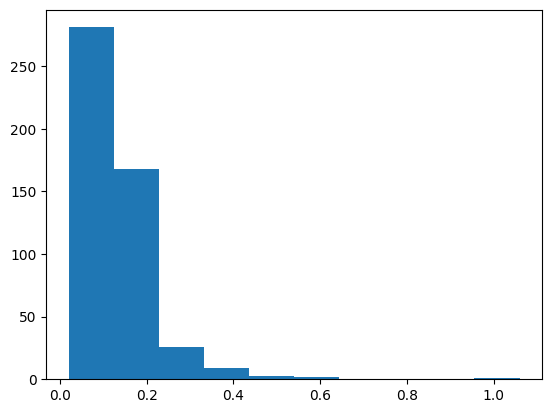

In [32]:
plt.hist(reconciled_data_lengths)

(array([  2.,  17., 113., 272.,  55.,  12.,   4.,   3.,   0.,   1.]),
 array([0.09418261, 0.12419665, 0.15421069, 0.18422473, 0.21423877,
        0.24425281, 0.27426685, 0.30428089, 0.33429493, 0.36430896,
        0.394323  ]),
 <BarContainer object of 10 artists>)

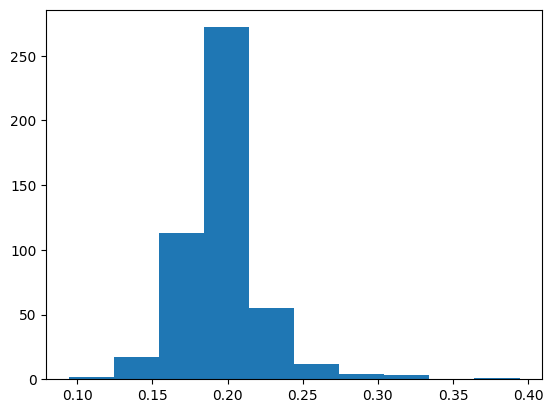

In [33]:
plt.hist(unreconciled_data_lengths)

In [34]:
#how much time was taken on measurements

In [35]:
user_contribution_number_dict = defaultdict(float)
user_list = data['user_name']

for user in user_list:
    user_contribution_number_dict[user] += 1

user_contribution_number = [i for i in user_contribution_number_dict.values()]

Text(0, 0.5, 'Number of Occurences')

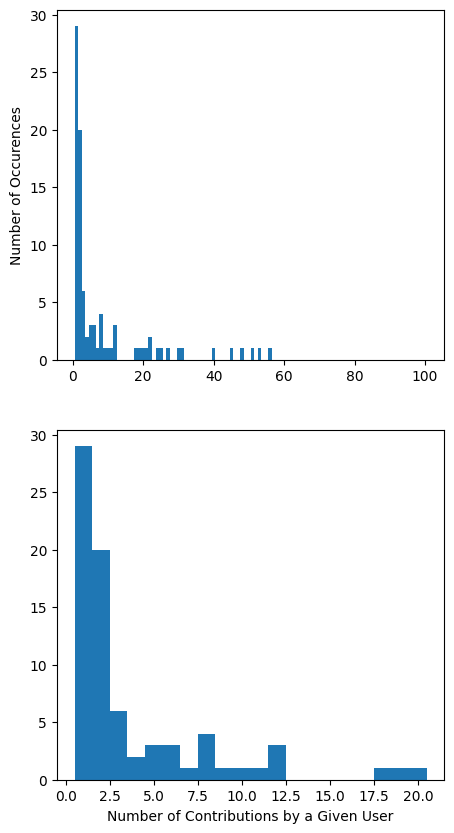

In [36]:
fig29,(axs29,axs30) = plt.subplots(2,1,
                    figsize = (5,10))

axs29.hist(user_contribution_number, range = (0.5, 100.5), bins = 100)
axs30.hist(user_contribution_number, range = (0.5, 20.5), bins = 20)

axs30.set_xlabel('Number of Contributions by a Given User')
axs29.set_ylabel('Number of Occurences')

In [37]:
print(statistics.mean(user_contribution_number))
print(statistics.median(user_contribution_number))

25.03061224489796
2.5


In [38]:
time_started = data['started_at']
time_finished = data['finished_at']

time_list = []
for start_time,finish_time in zip(time_started, time_finished):
    finish = datetime.datetime.strptime(finish_time, "%d-%b-%Y %H:%M:%S")
    start = datetime.datetime.strptime(start_time, "%d-%b-%Y %H:%M:%S")
    time_took = finish - start
    time_list.append(time_took.seconds)

Excludes quickest 5% and slowest 5% of data, starting at 14 seconds and ending at 140 seconds.
Average Time to Complete: 36
Median Time to Complete: 28.0


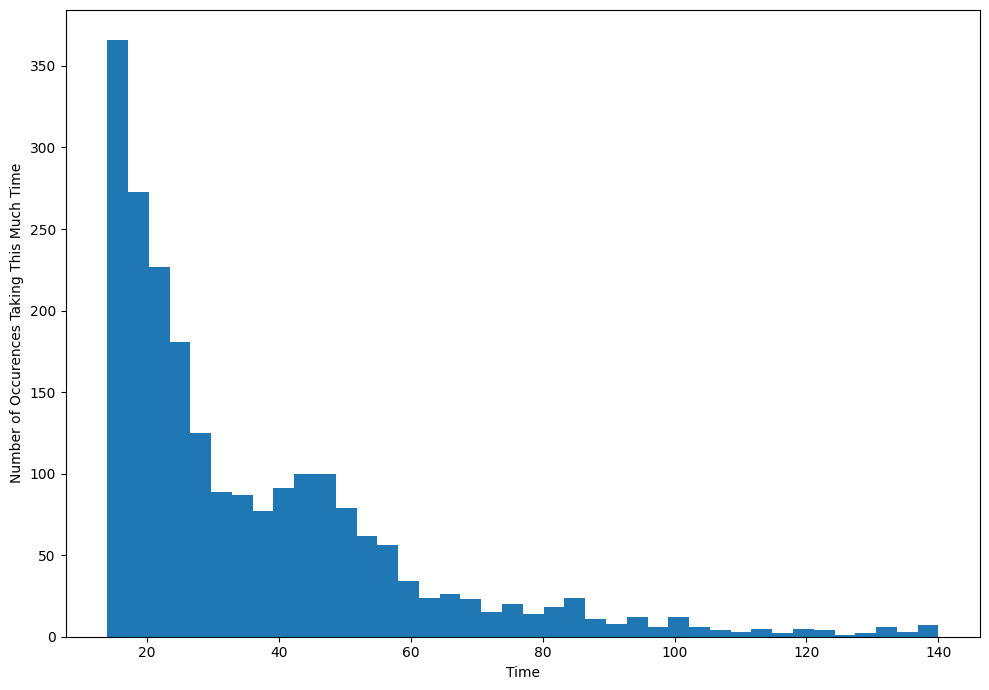

In [39]:
time_list = np.array(time_list)
time_list.sort()
time_list_short = time_list[ int( len(time_list)*0.05 ) : int( len(time_list)*0.95 ) ]

print(f'Excludes quickest 5% and slowest 5% of data, starting at {time_list[ int( len(time_list)*0.05 )]} seconds and ending at {time_list[ int( len(time_list)*0.95 ) ]} seconds.')

print(f'Average Time to Complete: {statistics.mean(time_list_short)}')
print(f'Median Time to Complete: {statistics.median(time_list_short)}')

fig, axs = plt.subplots(1, 1,
                        figsize =(10, 7),
                        tight_layout = True)
 
axs.hist(time_list_short, bins = 40 )
axs.set_xlabel('Time')
axs.set_ylabel('Number of Occurences Taking This Much Time')
plt.show()